In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/collisions_routieres.csv")

In [3]:
df.head()

,NO_SEQ_COLL,JR_SEMN_ACCDN,DT_ACCDN,CD_MUNCP,NO_CIVIQ_ACCDN,SFX_NO_CIVIQ_ACCDN,BORNE_KM_ACCDN,RUE_ACCDN,TP_REPRR_ACCDN,ACCDN_PRES_DE,...,NB_VICTIMES_VELO,VITESSE_AUTOR,LOC_X,LOC_Y,LOC_COTE_QD,LOC_COTE_PD,LOC_DETACHEE,LOC_IMPRECISION,LOC_LONG,LOC_LAT
0,SPVM _ 2012 _ 1,ME,2012/02/01,66102.0,3501.0,NaN,NaN,ST CHARLES,2.0,STAT,...,0,NaN,276517.37950,5.035127e+06,A,3,O,N,-73.861616,45.455505
1,SPVM _ 2012 _ 10,MA,2012/01/03,66023.0,NaN,NaN,NaN,TERR VILLE DE MTL,NaN,NaN,...,0,NaN,275209.46185,5.038619e+06,B,4,N,N,-73.878549,45.486871
2,SPVM _ 2012 _ 100,VE,2012/02/24,66023.0,NaN,NaN,NaN,JACQUES BIZARD,1.0,CHERRIER,...,0,50.0,275759.07900,5.039027e+06,A,1,N,O,-73.871542,45.490564
3,SPVM _ 2012 _ 1000,JE,2012/10/11,66142.0,11800.0,NaN,NaN,BD SALABERRY,NaN,NaN,...,0,NaN,280970.09315,5.038348e+06,A,1,O,N,-73.804841,45.484648
4,SPVM _ 2012 _ 10000,DI,2012/04/22,66023.0,38.0,NaN,NaN,PL DU COMMERCE,NaN,NaN,...,0,NaN,301391.47638,5.036357e+06,A,1,O,N,-73.543590,45.467136


In [7]:
df.columns.shape

(68,)

In [5]:
df.AN.dtype

dtype('int64')

# Describe for each variable

In [7]:
df.shape

(204010, 68)

### AN (DATE)

,index
AN,
2012,31652
2013,31607
2014,21402
2015,21574
2016,21673
2017,22058
2018,21447
2019,19327
2020,13270


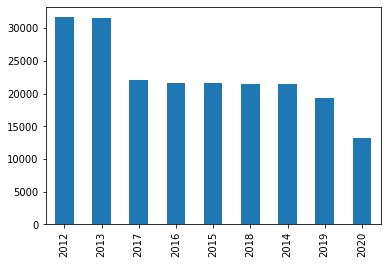

In [45]:
df.AN.value_counts().plot(kind='bar')
plt.savefig('./output/AN.png')

### NO_SEQ_COLL (ID)

### DT_ACCDN

In [18]:
df.DT_ACCDN = pd.to_datetime(df.DT_ACCDN)

In [53]:
df.DT_ACCDN.sort_values()

3206     2012-01-01
15702    2012-01-01
15713    2012-01-01
19743    2012-01-01
15724    2012-01-01
            ...    
195547   2020-12-31
202148   2020-12-31
193719   2020-12-31
196812   2020-12-31
200503   2020-12-31
Name: DT_ACCDN, Length: 204010, dtype: datetime64[ns]

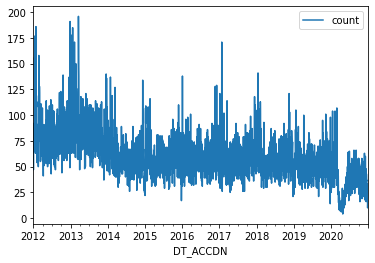

In [70]:
fig = df.DT_ACCDN.reset_index().rename(columns={'index':'count'}).groupby('DT_ACCDN').count().plot()
plt.savefig('./output/DT_ACCDN.png')

### HR_ACCDN

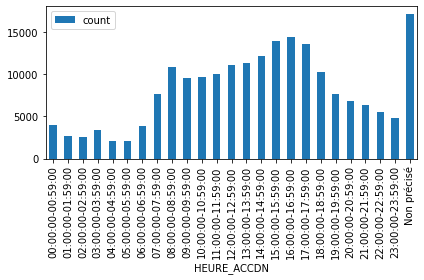

In [73]:
plot = df.HEURE_ACCDN.reset_index().rename(columns={'index':'count'}).groupby('HEURE_ACCDN').count().plot(kind='bar')
plt.tight_layout()
plt.savefig('./output/HEURE_ACCDN.png')

### JR_SEMN_ACCDN

In [12]:
df.JR_SEMN_ACCDN.value_counts()

VE    32961
JE    32715
ME    30856
MA    30753
LU    28338
SA    26243
DI    22144
Name: JR_SEMN_ACCDN, dtype: int64

In [76]:
index_jr_sem = ['DI', 'LU', 'MA', 'ME', 'JE', 'VE', 'SA']

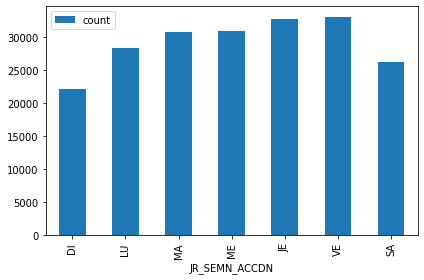

In [80]:
df.JR_SEMN_ACCDN.reset_index().rename(columns={'index':'count'}).groupby("JR_SEMN_ACCDN").count().reindex(index_jr_sem).plot(kind='bar')
plt.tight_layout()
plt.savefig('./output/JR_SEMN_ACCDN.png')

### GRAVITÉ

In [82]:
df.GRAVITE.value_counts()

Dommages matériels inférieurs au seuil de rapportage    82707
Dommages matériels seulement                            77522
Léger                                                   41864
Grave                                                    1680
Mortel                                                    237
Name: GRAVITE, dtype: int64

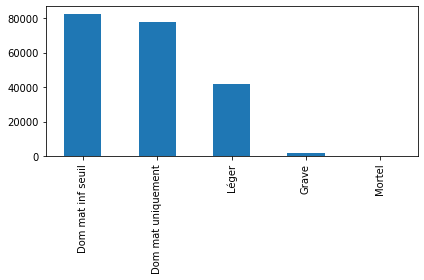

In [87]:
df.GRAVITE.value_counts().rename(index={'Dommages matériels inférieurs au seuil de rapportage': 'Dom mat inf seuil', 'Dommages matériels seulement': 'Dom mat uniquement'}) .plot(kind='bar')
plt.tight_layout()
plt.savefig('./output/GRAVITE.png')

In [207]:
def plot_NB(colName, df):
    df[colName].reset_index().rename(columns={'index':'count'}).groupby(colName).count().plot(kind='bar')
    print(df[colName].reset_index().rename(columns={'index':'count'}).groupby(colName).count())
    plt.tight_layout()
    plt.savefig(f"./output/{colName}.png", dpi =300)
    plt.close()

In [124]:
nb_col = ["NB_MORTS", "NB_BLESSES_GRAVES", "NB_BLESSES_LEGERS", "NB_VICTIMES_TOTAL", "NB_VEH_IMPLIQUES_ACCDN", "NB_DECES_PIETON",
          "NB_BLESSES_PIETON", "NB_VICTIMES_PIETON", "NB_DECES_MOTO", "NB_BLESSES_MOTO", "NB_VICTIMES_MOTO", "NB_VICTIMES_MOTO",
          "NB_BLESSES_VELO", "NB_VICTIMES_VELO", "NB_VICTIMES_PIETON", "NB_DECES_VELO"]

In [125]:
for col in nb_col:
    plot_NB(col, df)

### NB_MORTS

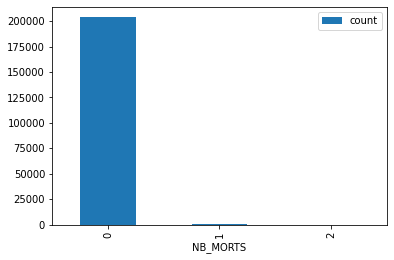

In [99]:
df.NB_MORTS.reset_index().rename(columns={'index':'count'}).groupby("NB_MORTS").count().plot(kind='bar')
plt.tight_layout()
plt.savefig('./output/NB_MORTS.png')

In [14]:
df.NB_MORTS.value_counts()

0    203773
1       231
2         6
Name: NB_MORTS, dtype: int64

In [ ]:
df.NB_MORTS

### NB_BLESSES_GRAVES

In [15]:
df.NB_BLESSES_GRAVES.mean()

0.0089211313170923

In [16]:
df.NB_BLESSES_GRAVES.value_counts()

0    202313
1      1595
2        84
3        15
4         3
Name: NB_BLESSES_GRAVES, dtype: int64

### NB_BLESSES_LEGERS


In [17]:
df.NB_BLESSES_LEGERS.mean()

0.254134601245037

In [18]:
df.NB_BLESSES_LEGERS.value_counts()

0     161853
1      34910
2       5546
3       1223
4        327
5         97
6         36
8          6
7          6
9          3
11         1
14         1
24         1
Name: NB_BLESSES_LEGERS, dtype: int64

### NB_VICTIMES_TOTAL

In [19]:
df.NB_VICTIMES_TOTAL.mean()

0.26424685064457626

In [20]:
df.NB_VICTIMES_TOTAL.value_counts()

0     160229
1      36253
2       5742
3       1273
4        341
5        115
6         36
7          7
8          7
9          4
15         2
27         1
Name: NB_VICTIMES_TOTAL, dtype: int64

### NB_VEH_IMPLIQUES_ACCDN

In [21]:
df.NB_VEH_IMPLIQUES_ACCDN.mean()

1.9504673859230321

In [22]:
df.NB_VEH_IMPLIQUES_ACCDN.value_counts()

2.0     156399
1.0      31649
3.0      11656
4.0       3525
5.0        502
6.0        188
7.0         41
8.0         23
9.0          8
10.0         5
14.0         4
11.0         3
12.0         1
31.0         1
18.0         1
13.0         1
Name: NB_VEH_IMPLIQUES_ACCDN, dtype: int64

### NB_DECES_PIETON

In [23]:
df.NB_DECES_PIETON.mean()

0.0007156511935689426

In [24]:
df.NB_DECES_PIETON.value_counts()

0    203865
1       144
2         1
Name: NB_DECES_PIETON, dtype: int64

### NB_BLESSES_PIETON

In [25]:
df.NB_BLESSES_PIETON.mean()

0.049816185481103864

In [26]:
df.NB_BLESSES_PIETON.value_counts()

0    194231
1      9434
2       319
3        19
4         5
7         2
Name: NB_BLESSES_PIETON, dtype: int64

### NB_VICTIMES_PIETON

In [27]:
df.NB_VICTIMES_PIETON.mean()

0.05053183667467281

In [28]:
df.NB_VICTIMES_PIETON.value_counts()

0    194094
1      9562
2       328
3        19
4         5
7         2
Name: NB_VICTIMES_PIETON, dtype: int64

### NB_DECES_MOTO

In [29]:
df.NB_DECES_MOTO.mean()

6.862408705455615e-05

In [30]:
df.NB_DECES_MOTO.value_counts()

0    203996
1        14
Name: NB_DECES_MOTO, dtype: int64

### NB_BLESSES_MOTO

In [31]:
df.NB_BLESSES_MOTO.mean()

0.007705504632125876

In [32]:
df.NB_BLESSES_MOTO.value_counts()

0    202515
1      1419
2        75
3         1
Name: NB_BLESSES_MOTO, dtype: int64

### NB_VICTIMES_MOTO

In [33]:
df.NB_VICTIMES_MOTO.mean()

0.007774128719180432

In [34]:
df.NB_VICTIMES_MOTO.value_counts()

0    202501
1      1433
2        75
3         1
Name: NB_VICTIMES_MOTO, dtype: int64

### NB_DECES_VELO

In [35]:
df.NB_DECES_VELO.mean()

0.00012744473310131855

In [36]:
df.NB_DECES_VELO.value_counts()

0    203984
1        26
Name: NB_DECES_VELO, dtype: int64

### NB_BLESSES_VELO

In [37]:
df.NB_BLESSES_VELO.mean()

0.029160335277682466

In [38]:
df.NB_BLESSES_VELO.value_counts()

0    198091
1      5889
2        30
Name: NB_BLESSES_VELO, dtype: int64

### NB_VICTIMES_VELO

In [39]:
df.NB_VICTIMES_VELO.mean()

0.029287780010783786

In [40]:
df.NB_VICTIMES_VELO.value_counts()

0    198065
1      5915
2        30
Name: NB_VICTIMES_VELO, dtype: int64

### CD_MUNCP

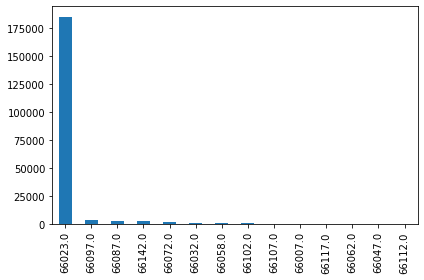

In [132]:
vdf = df.CD_MUNCP.value_counts()
vdf[vdf > 40].plot(kind='bar')
plt.tight_layout()
plt.savefig('./output/CD_MUNCP.png')

In [41]:
df.CD_MUNCP.value_counts()

66023.0    184893
66097.0      4096
66087.0      2828
66142.0      2804
66072.0      2009
            ...  
75017.0         1
60025.0         1
60028.0         1
41098.0         1
76025.0         1
Name: CD_MUNCP, Length: 81, dtype: int64

### REG_ADM

In [133]:
df.REG_ADM.value_counts()

Montréal (06)                          119252
Montréal(06)                            84621
Lanaudière (14)                            21
Montérégie (16)                            20
Lanaudière(14)                              9
Montérégie(16)                              8
Estrie (05)                                 7
Centre-du-Québec (17)                       6
Outaouais (07)                              6
Laval (13)                                  6
Mauricie (04)                               5
Laurentides (15)                            5
Capitale-Nationale (03)                     4
Estrie(05)                                  4
Capitale-Nationale(03)                      4
Abitibi-Témiscamingue (08)                  3
Abitibi-Témiscamingue(08)                   3
Chaudière-Appalaches(12)                    3
Laval(13)                                   2
Mauricie(04)                                2
Gaspésie/-Îles-de-la-Madeleine (11)         1
Gaspésie/-Îles-de-la-Madeleine(11)

In [143]:
df.REG_ADM = df.REG_ADM.replace('Montréal (06)', 'Montréal(06)')

In [147]:
df.REG_ADM.value_counts().sum() - 203873

125

### MRC

In [45]:
df.MRC.value_counts()

Montréal (66 )                          203873
Montcalm (63 )                              14
L'Assomption (60 )                          11
Laval (65 )                                  8
Sherbrooke (43 )                             7
Trois-Rivières (371)                         6
Québec (23 )                                 4
Rouville (55 )                               4
Marguerite-D'Youville (59 )                  4
Le Haut-Richelieu (56 )                      4
Beauharnois-Salaberry (70 )                  4
Longueuil (58 )                              4
Vaudreuil-Soulanges (71 )                    4
L'Érable (32 )                               3
Gatineau (81 )                               3
Nicolet-Yamaska (50 )                        3
Joliette (61 )                               3
Témiscamingue (85 )                          3
Charlevoix (16 )                             3
Le Granit (30 )                              2
La Mitis (09 )                               1
Antoine-Label

### NO_CIVIQ_ACCDN

In [46]:
df.NO_CIVIQ_ACCDN.value_counts()

6801.0     581
7275.0     431
7999.0     333
800.0      303
7077.0     288
          ... 
3306.0       1
7468.0       1
8586.0       1
3393.0       1
11432.0      1
Name: NO_CIVIQ_ACCDN, Length: 11559, dtype: int64

### SFX_NO_CIVIQ_ACCDN

In [47]:
df.SFX_NO_CIVIQ_ACCDN.value_counts()

A      103
F       95
B       22
P       17
E       11
      ... 
6        1
107      1
10       1
20       1
,        1
Name: SFX_NO_CIVIQ_ACCDN, Length: 87, dtype: int64

### RUE_ACCDN

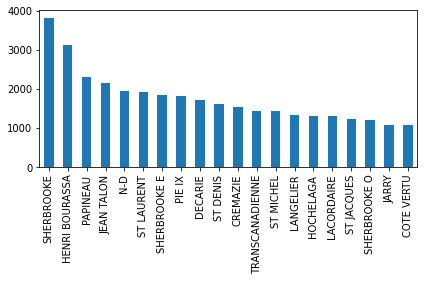

In [158]:
df.RUE_ACCDN.value_counts()[:20].plot(kind='bar')
plt.tight_layout()
plt.savefig('./output/RUE_ACCDN.png')

### TP_REPRR_ACCDN

In [49]:
df.TP_REPRR_ACCDN.value_counts()

1.0    110566
2.0     16046
0.0        15
Name: TP_REPRR_ACCDN, dtype: int64

### ACCDN_PRES_DE

In [50]:
df.ACCDN_PRES_DE.value_counts()

FACE                         1977
SHERBROOKE                   1582
JEAN TALON                   1238
STAT                         1077
PAPINEAU                     1060
                             ... 
PRES POTEAU 27                  1
PRES DE L INNOVATION            1
STT DU TARGET                   1
SEVILLY                         1
MAJEAU ET HOTEL  DE VILLE       1
Name: ACCDN_PRES_DE, Length: 19734, dtype: int64

### NO_ROUTE 

In [51]:
df.NO_ROUTE.value_counts()

0.0      216
138.0    171
335.0     54
40.0      39
125.0     37
19.0      23
117.0     15
20.0      14
15.0      14
720.0      7
520.0      7
132.0      4
175.0      3
301.0      3
134.0      3
205.0      2
50.0       2
221.0      2
122.0      2
220.0      2
148.0      2
25.0       2
235.0      2
101.0      2
299.0      1
195.0      1
112.0      1
222.0      1
10.0       1
5.0        1
340.0      1
381.0      1
165.0      1
345.0      1
395.0      1
210.0      1
233.0      1
228.0      1
232.0      1
372.0      1
116.0      1
371.0      1
13.0       1
208.0      1
315.0      1
104.0      1
321.0      1
361.0      1
Name: NO_ROUTE, dtype: int64

### CD_PNT_CDRNL_ROUTE

In [52]:
df.CD_PNT_CDRNL_ROUTE.value_counts()

O    73
E    63
N    44
S    36
Name: CD_PNT_CDRNL_ROUTE, dtype: int64

### BORNE_KM_ACCDN

In [53]:
df.BORNE_KM_ACCDN.value_counts()

0.3       2
1.0       2
4.6       1
65.1      1
62.3      1
77.0      1
270.7     1
1307.0    1
3610.0    1
81.9      1
920.1     1
89.1      1
67.8      1
511.5     1
670.1     1
90.0      1
50.0      1
355.0     1
1220.0    1
30.0      1
64.0      1
65.4      1
208.3     1
682.0     1
121.5     1
936.0     1
110.1     1
85.0      1
54.8      1
76.2      1
69.0      1
1195.5    1
62.0      1
2.0       1
506.0     1
643.0     1
541.5     1
32.0      1
65.2      1
5801.0    1
4911.0    1
3345.0    1
58.3      1
8410.0    1
4354.0    1
703.3     1
501.2     1
163.5     1
87.3      1
49.9      1
634.0     1
58.0      1
74.9      1
76.6      1
5321.0    1
99.0      1
357.5     1
Name: BORNE_KM_ACCDN, dtype: int64

### NB_METRE_DIST_ACCD

In [54]:
df.NB_METRE_DIST_ACCD

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
204005   NaN
204006   NaN
204007   NaN
204008   NaN
204009   NaN
Name: NB_METRE_DIST_ACCD, Length: 204010, dtype: float64

In [55]:
df.NB_METRE_DIST_ACCD.value_counts()

10.0      8558
5.0       7893
50.0      5515
20.0      5225
100.0     4274
          ... 
810.0        1
209.0        1
215.0        1
39.0         1
1100.0       1
Name: NB_METRE_DIST_ACCD, Length: 147, dtype: int64

###  CD_PNT_CDRNL_REPRR

In [56]:
df.CD_PNT_CDRNL_REPRR

0         NaN
1         NaN
2           E
3         NaN
4         NaN
         ... 
204005    NaN
204006    NaN
204007    NaN
204008    NaN
204009    NaN
Name: CD_PNT_CDRNL_REPRR, Length: 204010, dtype: object

In [57]:
df.CD_PNT_CDRNL_REPRR.value_counts()

N    17647
S    17352
O    14709
E    14707
0        1
Name: CD_PNT_CDRNL_REPRR, dtype: int64

### VITESSE_AUTOR

In [58]:
df.VITESSE_AUTOR

0          NaN
1          NaN
2         50.0
3          NaN
4          NaN
          ... 
204005     NaN
204006     NaN
204007    50.0
204008    50.0
204009    40.0
Name: VITESSE_AUTOR, Length: 204010, dtype: float64

In [159]:
df.VITESSE_AUTOR.value_counts()

50.0     82765
40.0     28872
30.0      8134
10.0      1438
60.0      1380
70.0       486
20.0       414
90.0        76
80.0        48
100.0       35
Name: VITESSE_AUTOR, dtype: int64

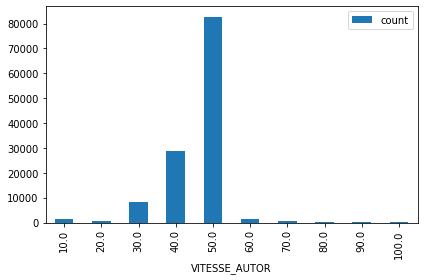

In [161]:
plot = df.VITESSE_AUTOR.reset_index().rename(columns={'index':'count'}).groupby('VITESSE_AUTOR').count().plot(kind='bar')
plt.tight_layout()
plt.savefig('./output/VITESSE_AUTOR.png')

### CD_GENRE_ACCDN

In [60]:
df.CD_GENRE_ACCDN

0         31.0
1         31.0
2         31.0
3         31.0
4         31.0
          ... 
204005     NaN
204006    31.0
204007    31.0
204008    52.0
204009    31.0
Name: CD_GENRE_ACCDN, Length: 204010, dtype: float64

In [170]:
new_index={31:'Collision avec véhicule routier',
           32: 'Collision avec piéton',
           33: 'Collision avec cycliste'}

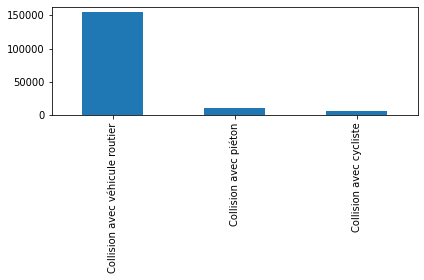

In [177]:
vdf = df.CD_GENRE_ACCDN.value_counts()
vdf = vdf[vdf >3500]
vdf.rename(index= new_index, inplace=True)
vdf.plot(kind='bar')
plt.tight_layout()
plt.savefig('./output/CD_GENRE_ACCDN.png')

### CD_SIT_PRTCE_ACCDN

In [62]:
df.CD_SIT_PRTCE_ACCDN

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
204005   NaN
204006   NaN
204007   NaN
204008   NaN
204009   NaN
Name: CD_SIT_PRTCE_ACCDN, Length: 204010, dtype: float64

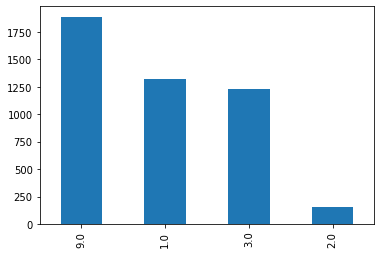

In [179]:
df.CD_SIT_PRTCE_ACCDN.value_counts().plot(kind='bar')
plt.savefig('./output/CD_SIT_PRTCE_ACCDN.png')

### CD_ETAT_SURFC

In [64]:
df.CD_ETAT_SURFC

0         16.0
1         11.0
2         11.0
3         11.0
4         12.0
          ... 
204005    11.0
204006    11.0
204007    11.0
204008    11.0
204009    11.0
Name: CD_ETAT_SURFC, Length: 204010, dtype: float64

In [180]:
df.CD_ETAT_SURFC.value_counts()

11.0    125706
12.0     33111
16.0     20179
18.0      5805
15.0      3059
17.0      2533
99.0       682
13.0       273
14.0       256
19.0        68
20.0        32
Name: CD_ETAT_SURFC, dtype: int64

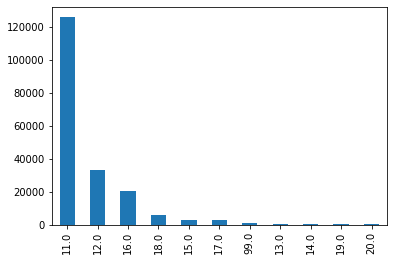

In [181]:
df.CD_ETAT_SURFC.value_counts().plot(kind='bar')
plt.savefig('./output/CD_ETAT_SURFC.png')

### CD_ECLRM

In [66]:
df.CD_ECLRM

0         1.0
1         NaN
2         3.0
3         1.0
4         1.0
         ... 
204005    1.0
204006    1.0
204007    1.0
204008    1.0
204009    3.0
Name: CD_ECLRM, Length: 204010, dtype: float64

In [182]:
df.CD_ECLRM.value_counts()

1.0    128499
3.0     51789
2.0     10192
4.0      1123
Name: CD_ECLRM, dtype: int64

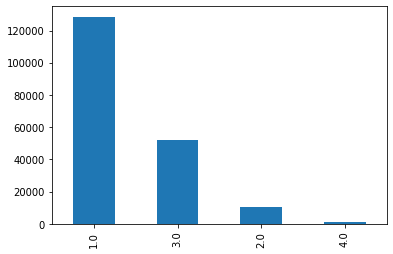

In [185]:
df.CD_ECLRM.value_counts().plot(kind='bar')
plt.savefig('./output/CD_ECLRM.png')

### CD_ENVRN_ACCDN

In [68]:
df.CD_ENVRN_ACCDN

0         1.0
1         NaN
2         3.0
3         3.0
4         3.0
         ... 
204005    2.0
204006    2.0
204007    4.0
204008    2.0
204009    2.0
Name: CD_ENVRN_ACCDN, Length: 204010, dtype: float64

In [184]:
df.CD_ENVRN_ACCDN.value_counts()

3.0    95011
2.0    85434
4.0     9247
1.0     4048
9.0     1532
7.0     1410
5.0      579
6.0       61
Name: CD_ENVRN_ACCDN, dtype: int64

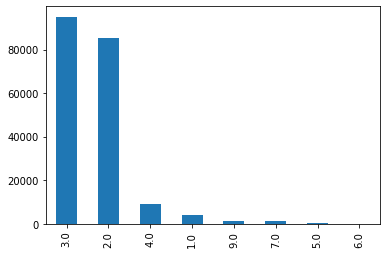

In [186]:
df.CD_ENVRN_ACCDN.value_counts().plot(kind='bar')
plt.savefig('./output/CD_ENVRN_ACCDN.png')

### CD_CATEG_ROUTE

In [70]:
df.CD_CATEG_ROUTE

0         21.0
1          NaN
2         13.0
3         21.0
4         21.0
          ... 
204005    13.0
204006    13.0
204007    13.0
204008    14.0
204009    14.0
Name: CD_CATEG_ROUTE, Length: 204010, dtype: float64

In [71]:
df.CD_CATEG_ROUTE.value_counts()

13.0    90860
14.0    63638
21.0    23956
11.0     7295
12.0     3682
22.0     3643
19.0     2141
16.0     1393
15.0      954
29.0      480
23.0      224
24.0       37
25.0       16
Name: CD_CATEG_ROUTE, dtype: int64

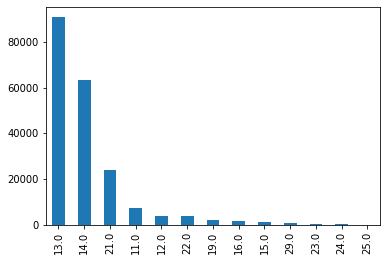

In [187]:
df.CD_CATEG_ROUTE.value_counts().plot(kind='bar')
plt.savefig('./output/CD_CATEG_ROUTE.png')

### CD_ETAT_CHASS

In [72]:
df.CD_ETAT_CHASS

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
204005    NaN
204006    1.0
204007    NaN
204008    NaN
204009    NaN
Name: CD_ETAT_CHASS, Length: 204010, dtype: float64

In [73]:
df.CD_ETAT_CHASS.value_counts()

1.0    47464
2.0      571
5.0      470
9.0      254
6.0       67
4.0       47
3.0       34
Name: CD_ETAT_CHASS, dtype: int64

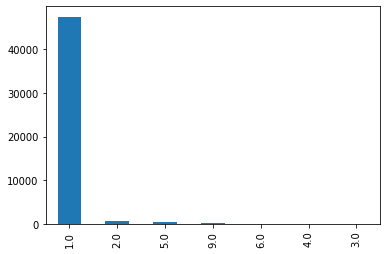

In [188]:
df.CD_ETAT_CHASS.value_counts().plot(kind='bar')
plt.savefig('./output/CD_ETAT_CHASS.png')

### CD_ASPCT_ROUTE

In [74]:
df.CD_ASPCT_ROUTE

0         11.0
1          NaN
2         21.0
3         11.0
4         11.0
          ... 
204005    13.0
204006    11.0
204007    11.0
204008    13.0
204009    11.0
Name: CD_ASPCT_ROUTE, Length: 204010, dtype: float64

In [189]:
df.CD_ASPCT_ROUTE.value_counts()

11.0    177323
13.0      7042
21.0      3554
12.0      2955
14.0      2323
23.0       735
22.0       398
24.0       277
Name: CD_ASPCT_ROUTE, dtype: int64

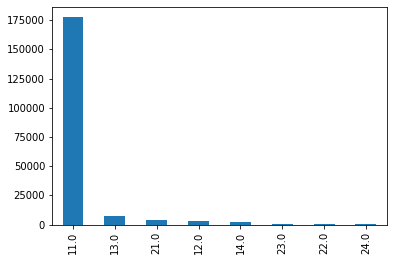

In [190]:
df.CD_ASPCT_ROUTE.value_counts().plot(kind='bar')
plt.savefig('./output/CD_ASPCT_ROUTE.png')

### CD_LOCLN_ACCDN

In [76]:
df.CD_LOCLN_ACCDN

0         33.0
1          NaN
2         32.0
3         40.0
4         40.0
          ... 
204005    32.0
204006    33.0
204007    33.0
204008    99.0
204009    34.0
Name: CD_LOCLN_ACCDN, Length: 204010, dtype: float64

In [191]:
df.CD_LOCLN_ACCDN.value_counts()

32.0    76965
33.0    44373
34.0    35655
99.0    15926
40.0    11448
31.0     1038
37.0      742
39.0      549
35.0      207
36.0      121
38.0       80
0.0         1
Name: CD_LOCLN_ACCDN, dtype: int64

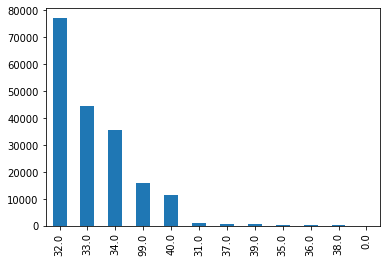

In [193]:
df.CD_LOCLN_ACCDN.value_counts().plot(kind='bar')
plt.savefig('./output/CD_LOCLN_ACCDN.png')

### CD_POSI_ACCDN

In [78]:
df.CD_POSI_ACCDN

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
204005    NaN
204006    6.0
204007    NaN
204008    NaN
204009    NaN
Name: CD_POSI_ACCDN, Length: 204010, dtype: float64

In [194]:
df.CD_POSI_ACCDN.value_counts()

6.0     39034
10.0     2068
5.0      1036
7.0       774
9.0       548
8.0       410
1.0       405
2.0       314
4.0       303
3.0       152
0.0         1
Name: CD_POSI_ACCDN, dtype: int64

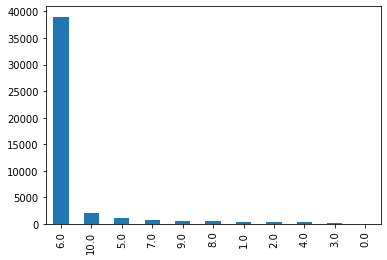

In [195]:
df.CD_POSI_ACCDN.value_counts().plot(kind='bar')
plt.savefig('./output/CD_POSI_ACCDN.png')

### CD_CONFG_ROUTE

In [80]:
df.CD_CONFG_ROUTE

0         4.0
1         NaN
2         1.0
3         2.0
4         NaN
         ... 
204005    3.0
204006    2.0
204007    2.0
204008    2.0
204009    1.0
Name: CD_CONFG_ROUTE, Length: 204010, dtype: float64

In [196]:
df.CD_CONFG_ROUTE.value_counts()

3.0    53186
2.0    53018
1.0    50340
9.0    12197
5.0     8257
4.0     6230
Name: CD_CONFG_ROUTE, dtype: int64

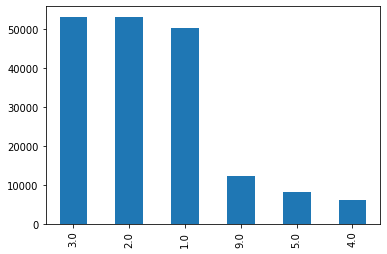

In [198]:
df.CD_CONFG_ROUTE.value_counts().plot(kind='bar')
plt.savefig('./output/CD_CONFG_ROUTE.png')

### CD_ZON_TRAVX_ROUTR

In [82]:
df.CD_ZON_TRAVX_ROUTR

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
204005   NaN
204006   NaN
204007   NaN
204008   NaN
204009   NaN
Name: CD_ZON_TRAVX_ROUTR, Length: 204010, dtype: float64

In [199]:
df.CD_ZON_TRAVX_ROUTR.value_counts()

2.0    2589
1.0    1585
0.0      13
Name: CD_ZON_TRAVX_ROUTR, dtype: int64

### CD_COND_METEO

In [84]:
df.CD_COND_METEO

0         11.0
1         11.0
2         11.0
3         11.0
4         12.0
          ... 
204005    11.0
204006    11.0
204007    11.0
204008    11.0
204009    11.0
Name: CD_COND_METEO, Length: 204010, dtype: float64

In [85]:
df.CD_COND_METEO.value_counts()

11.0    133068
12.0     27747
14.0     14114
17.0     11111
18.0      1387
99.0      1123
15.0      1083
19.0       615
16.0       407
13.0       290
Name: CD_COND_METEO, dtype: int64

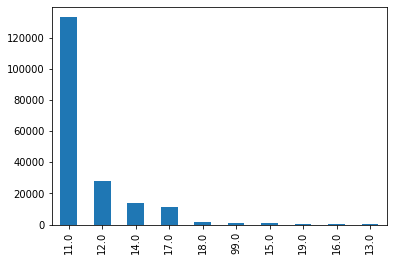

In [200]:
df.CD_COND_METEO.value_counts().plot(kind='bar')
plt.savefig('./output/CD_COND_METEO.png')

In [206]:
col_nb = ["nb_automobile_camion_leger", "nb_camionLourd_tractRoutier", "nb_outil_equipement",
          "nb_tous_autobus_minibus", "nb_bicyclette", "nb_cyclomoteur", "nb_motocyclette",
          "nb_taxi", "nb_urgence", "nb_motoneige", "nb_VHR", "nb_autres_types", "nb_veh_non_precise"]

In [209]:
for col in col_nb:
    plot_NB(col, df)

                            count
nb_automobile_camion_leger       
0.0                         14060
1.0                         93009
2.0                         84338
3.0                          9661
4.0                          2299
5.0                           441
6.0                           128
7.0                            36
8.0                            12
9.0                            10
10.0                            3
11.0                            3
12.0                            2
13.0                            2
14.0                            1
17.0                            1
30.0                            1
                              count
nb_camionLourd_tractRoutier        
0.0                          183719
1.0                           19570
2.0                             706
3.0                              12
                      count
nb_outil_equipement        
0.0                  201031
1.0                    2964
2.0                      1

### nb_automobile_camion_leger

In [86]:
df.nb_automobile_camion_leger.sum()

303449.0

In [87]:
df.nb_automobile_camion_leger.value_counts()

1.0     93009
2.0     84338
0.0     14060
3.0      9661
4.0      2299
5.0       441
6.0       128
7.0        36
8.0        12
9.0        10
11.0        3
10.0        3
13.0        2
12.0        2
14.0        1
30.0        1
17.0        1
Name: nb_automobile_camion_leger, dtype: int64

In [88]:
df.nb_automobile_camion_leger.mean()

1.4874440582921173

### nb_camionLourd_tractRoutier

In [89]:
df.nb_camionLourd_tractRoutier

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
204005    0.0
204006    0.0
204007    0.0
204008    0.0
204009    0.0
Name: nb_camionLourd_tractRoutier, Length: 204010, dtype: float64

In [90]:
df.nb_camionLourd_tractRoutier.value_counts()

0.0    183719
1.0     19570
2.0       706
3.0        12
Name: nb_camionLourd_tractRoutier, dtype: int64

In [91]:
df.nb_camionLourd_tractRoutier.mean()

0.10302587656305912

### nb_outil_equipement

In [92]:
df.nb_outil_equipement

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
204005    0.0
204006    0.0
204007    0.0
204008    0.0
204009    0.0
Name: nb_outil_equipement, Length: 204010, dtype: float64

In [93]:
df.nb_outil_equipement.value_counts()

0.0    201031
1.0      2964
2.0        12
Name: nb_outil_equipement, dtype: int64

In [94]:
df.nb_outil_equipement.mean()

0.014646556245619023

### nb_tous_autobus_minibus

In [95]:
df.nb_tous_autobus_minibus

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
204005    0.0
204006    0.0
204007    0.0
204008    0.0
204009    0.0
Name: nb_tous_autobus_minibus, Length: 204010, dtype: float64

In [96]:
df.nb_tous_autobus_minibus.value_counts()

0.0    198765
1.0      5172
2.0        69
3.0         1
Name: nb_tous_autobus_minibus, dtype: int64

In [97]:
df.nb_tous_autobus_minibus.mean()

0.026043224007019368

### nb_bicyclette 

In [98]:
df.nb_bicyclette

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
204005    0.0
204006    0.0
204007    0.0
204008    0.0
204009    0.0
Name: nb_bicyclette, Length: 204010, dtype: float64

In [99]:
df.nb_bicyclette.value_counts()

0.0    196030
1.0      7939
2.0        36
7.0         1
3.0         1
Name: nb_bicyclette, dtype: int64

In [100]:
df.nb_bicyclette.mean()

0.0393172783286848

### nb_cyclomoteur

In [101]:
df.nb_cyclomoteur

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
204005    0.0
204006    0.0
204007    0.0
204008    0.0
204009    0.0
Name: nb_cyclomoteur, Length: 204010, dtype: float64

In [102]:
df.nb_cyclomoteur.value_counts()

0.0    202763
1.0      1230
2.0        14
Name: nb_cyclomoteur, dtype: int64

In [103]:
df.nb_cyclomoteur.mean()

0.006166455072620057

### nb_motocyclette|

In [104]:
df.nb_motocyclette

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
204005    0.0
204006    1.0
204007    0.0
204008    0.0
204009    0.0
Name: nb_motocyclette, Length: 204010, dtype: float64

In [105]:
df.nb_motocyclette.value_counts()

0.0    201299
1.0      2667
2.0        38
3.0         3
Name: nb_motocyclette, dtype: int64

In [106]:
df.nb_motocyclette.mean()

0.013489733195429569

### nb_taxi

In [107]:
df.nb_taxi

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
204005    0.0
204006    0.0
204007    0.0
204008    0.0
204009    0.0
Name: nb_taxi, Length: 204010, dtype: float64

In [108]:
df.nb_taxi.value_counts()

0.0    197368
1.0      6458
2.0       178
3.0         2
7.0         1
Name: nb_taxi, dtype: int64

In [109]:
df.nb_taxi.mean()

0.03346453798153985

### nb_urgence

In [110]:
df.nb_urgence

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
204005    0.0
204006    0.0
204007    0.0
204008    0.0
204009    0.0
Name: nb_urgence, Length: 204010, dtype: float64

In [111]:
df.nb_urgence.value_counts()

0.0    197615
1.0      6016
2.0       373
3.0         2
4.0         1
Name: nb_urgence, dtype: int64

In [112]:
df.nb_urgence.mean()

0.03319493938933468

### nb_motoneige

In [113]:
df.nb_motoneige

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
204005    0.0
204006    0.0
204007    0.0
204008    0.0
204009    0.0
Name: nb_motoneige, Length: 204010, dtype: float64

In [114]:
df.nb_motoneige.value_counts()

0.0    204001
1.0         6
Name: nb_motoneige, dtype: int64

In [115]:
df.nb_motoneige.mean()

2.9410755513291212e-05

### nb_VHR

In [116]:
df.nb_VHR

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
204005    0.0
204006    0.0
204007    0.0
204008    0.0
204009    0.0
Name: nb_VHR, Length: 204010, dtype: float64

In [117]:
df.nb_VHR.value_counts()

0.0    203994
1.0        13
Name: nb_VHR, dtype: int64

In [118]:
df.nb_VHR.mean()

6.372330361213096e-05

### nb_autres_types

In [119]:
df.nb_autres_types

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
204005    0.0
204006    0.0
204007    0.0
204008    0.0
204009    0.0
Name: nb_autres_types, Length: 204010, dtype: float64

In [120]:
df.nb_autres_types.value_counts()

0.0    202858
1.0      1144
2.0         4
3.0         1
Name: nb_autres_types, dtype: int64

In [121]:
df.nb_autres_types.mean()

0.005661570436308558

### nb_veh_non_precise 

In [122]:
df.nb_veh_non_precise

0         1.0
1         1.0
2         0.0
3         0.0
4         1.0
         ... 
204005    0.0
204006    0.0
204007    0.0
204008    0.0
204009    0.0
Name: nb_veh_non_precise, Length: 204010, dtype: float64

In [123]:
df.nb_veh_non_precise.value_counts()

0.0    165869
1.0     37948
2.0       184
3.0         4
4.0         1
5.0         1
Name: nb_veh_non_precise, dtype: int64

In [124]:
df.nb_veh_non_precise.mean()

0.1879200223521742

### 